# Data preparation and Exploration for Cycle Inspections

Prepare data from [restaurant inspections](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/xx67-kt59) Note: Exported as csv.

Make some descriptives for the data set.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Separate cycle 
CycleInspections_out = pd.read_csv('CycleInspections_out.csv', sep=',',engine='python')
len(CycleInspections_out)

326871

In [3]:
CycleInspections_out.head()

,Unnamed: 0,CAMIS,date,BORO,DBA,INSPECTION TYPE,SCORE,GRADE DATE,RECORD DATE,year,month,day,VIOLATION CODE,VIOLATION DESCRIPTION
0,1,41312955,2014-04-01,QUEENS,RIPE JUICE BAR & GRILL,Cycle Inspection / Re-inspection,12.0,04/01/2014,07/15/2017,2014,4,1,02G,Cold food item held above 41Ã‚Âº F (smoked fis...
1,2,41601691,2015-10-26,BROOKLYN,WAZA SUSHI,Cycle Inspection / Initial Inspection,25.0,NaN,07/15/2017,2015,10,26,10H,Proper sanitization not provided for utensil w...
2,3,50043431,2017-05-19,MANHATTAN,SEATTLE CAFE,Cycle Inspection / Initial Inspection,35.0,NaN,07/15/2017,2017,5,19,10F,Non-food contact surface improperly constructe...
3,4,50001580,2015-12-01,STATEN ISLAND,CIRO PIZZA CAFE,Cycle Inspection / Re-inspection,8.0,12/01/2015,07/15/2017,2015,12,1,02G,Cold food item held above 41Ã‚Âº F (smoked fis...
4,6,41722020,2017-04-12,BRONX,2 BROS PIZZA,Cycle Inspection / Initial Inspection,22.0,NaN,07/15/2017,2017,4,12,04A,Food Protection Certificate not held by superv...


One table with violation groups and violation description

In [4]:
CycleInspections_out['violation groups'] = CycleInspections_out['VIOLATION CODE'].str.extract('(\d\d)', expand=True)
CycleInspections_out.head()

,Unnamed: 0,CAMIS,date,BORO,DBA,INSPECTION TYPE,SCORE,GRADE DATE,RECORD DATE,year,month,day,VIOLATION CODE,VIOLATION DESCRIPTION,violation groups
0,1,41312955,2014-04-01,QUEENS,RIPE JUICE BAR & GRILL,Cycle Inspection / Re-inspection,12.0,04/01/2014,07/15/2017,2014,4,1,02G,Cold food item held above 41Ã‚Âº F (smoked fis...,02
1,2,41601691,2015-10-26,BROOKLYN,WAZA SUSHI,Cycle Inspection / Initial Inspection,25.0,NaN,07/15/2017,2015,10,26,10H,Proper sanitization not provided for utensil w...,10
2,3,50043431,2017-05-19,MANHATTAN,SEATTLE CAFE,Cycle Inspection / Initial Inspection,35.0,NaN,07/15/2017,2017,5,19,10F,Non-food contact surface improperly constructe...,10
3,4,50001580,2015-12-01,STATEN ISLAND,CIRO PIZZA CAFE,Cycle Inspection / Re-inspection,8.0,12/01/2015,07/15/2017,2015,12,1,02G,Cold food item held above 41Ã‚Âº F (smoked fis...,02
4,6,41722020,2017-04-12,BRONX,2 BROS PIZZA,Cycle Inspection / Initial Inspection,22.0,NaN,07/15/2017,2017,4,12,04A,Food Protection Certificate not held by superv...,04


In [5]:
CycleInspections_out['INSPECTION TYPE'].value_counts()
# how many initial inspections do not have a re-inspection?
# hyp: only those with initial inspection grade = A

Cycle Inspection / Initial Inspection    225319
Cycle Inspection / Re-inspection         101552
Name: INSPECTION TYPE, dtype: int64

For each year and inspection type, how many violations were in each group type?

In [5]:
CycleInspections_out['presence'] =1

In [6]:
viol_present_table = CycleInspections_out.groupby(['violation groups','INSPECTION TYPE','year'], as_index=False)['presence'].sum()

In [7]:
viol_present_table.head()

,violation groups,INSPECTION TYPE,year,presence
0,02,Cycle Inspection / Initial Inspection,2014,8450
1,02,Cycle Inspection / Initial Inspection,2015,10252
2,02,Cycle Inspection / Initial Inspection,2016,9403
3,02,Cycle Inspection / Initial Inspection,2017,4877
4,02,Cycle Inspection / Re-inspection,2014,3900


To get the plot showing groups for every year and inspection type, pivot (reshape) 'viol_present_table'.
?
From previous work we get violation groups with missing values. A. 
No, yet pivot is not direct! For some reason the direct pivot it is not working too.
Looking for a plot like this:
https://pandas.pydata.org/pandas-docs/stable/visualization.html#bar-plots


<Container object of 80 artists>

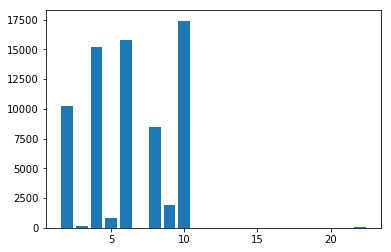

In [8]:
#viol_present_table['violation groups'] = viol_present_table['violation groups'].fillna(0)
#viol_present_table.isnull()
#viol_present_table.pivot(index='violation groups',columns=['Cycle Inspection / Initial Inspection','Cycle Inspection / Re-inspection','2014','2015','2016','2017'],values='presence')
# viol_present_table.pivot(index='year',columns=['violation groups','INSPECTION TYPE'],values='presence')
type(pd.to_numeric(viol_present_table['violation groups']).astype(np.int64))
#plt.bar(viol_present_table['violation groups'],viol_present_table['presence'])
plt.bar(pd.to_numeric(viol_present_table['violation groups']).astype(np.int64),viol_present_table['presence'])
#plt.bar(pd.to_numeric(viol_present_table['violation groups'][viol_present_table['year']==2014]).astype(np.int64),viol_present_table['presence'][viol_present_table['year']==2014])

KeyError: 1

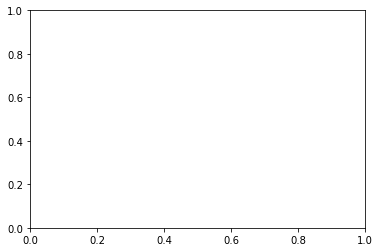

In [18]:
#plt.bar(pd.to_numeric(viol_present_table['violation groups'][viol_present_table['year']==2014]).astype(np.int64),viol_present_table['presence'][viol_present_table['year']==2014])
# for each year
# plot side by side the inspection type
# violation group bars
#viol_present_table['violation groups'][viol_present_table['year'] == 2014]
cii_2014 = viol_present_table[(viol_present_table['year'] == 2014) & (viol_present_table['INSPECTION TYPE'] == 'Cycle Inspection / Initial Inspection')]
#plt.bar(pd.to_numeric(viol_present_table['violation groups']).astype(np.int64),viol_present_table['presence'])
#plt.bar(pd.to_numeric(cii_2014['violation groups']).astype(np.int64),cii_2014['presence'])
plt.bar(pd.to_numeric(cii_2014['violation groups']).astype(np.int64),cii_2014['presence'])
#cii_2014

In [80]:
data = pd.DataFrame({'value' : [1,2,3,4,5,6,7,8,9,10,11,12],
                  'group' : ['a','a','a','b','b','b','b','c','c','c','d','d']})
data.groupby('group').sum()
#data.pivot(columns='group')

,value
group,
a,6
b,22
c,27
d,23


In [51]:
# for each year
# plot side by side the inspection type
# violation group bars
#viol_present_table['violation groups'][viol_present_table['year'] == 2014]
vgr_2014 = pd.to_numeric( CycleInspections_out['violation groups'][CycleInspections_out['year'] == 2014]).fillna(0).astype(np.int64)
vgr_2014 = vgr_2014[vgr_2014 < 22]
vgr_2015 = pd.to_numeric( CycleInspections_out['violation groups'][CycleInspections_out['year'] == 2015]).fillna(0).astype(np.int64)
vgr_2015 = vgr_2015[vgr_2015 < 22]
vgr_2016 = pd.to_numeric( CycleInspections_out['violation groups'][CycleInspections_out['year'] == 2016]).fillna(0).astype(np.int64)
vgr_2016 = vgr_2016[vgr_2016 < 22]
vgr_2017 = pd.to_numeric( CycleInspections_out['violation groups'][CycleInspections_out['year'] == 2017]).fillna(0).astype(np.int64)
vgr_2017 = vgr_2017[vgr_2017 < 22]

(array([  1.61000000e+02,   0.00000000e+00,   1.23500000e+04,
          1.61000000e+02,   1.86950000e+04,   8.15000000e+02,
          1.48060000e+04,   1.40000000e+01,   1.00940000e+04,
          2.24090000e+04]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

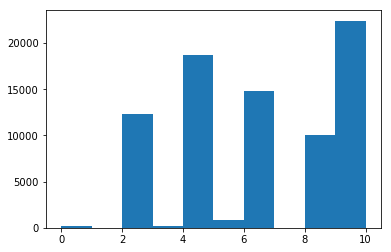

In [52]:
#type(vgr_2014[0]) # int64
#vgr_2014.hist()
groups_max = vgr_2014.max()
plt.hist(vgr_2014,bins = 10)
#groups_max

(array([  2.26000000e+02,   0.00000000e+00,   1.47130000e+04,
          1.70000000e+02,   2.21900000e+04,   9.98000000e+02,
          2.05310000e+04,   7.00000000e+00,   1.20080000e+04,
          2.88540000e+04]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

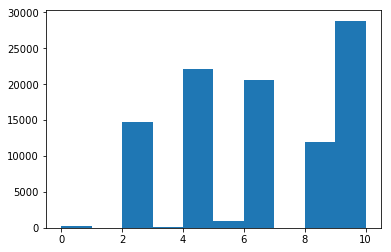

In [53]:
plt.hist(vgr_2015,bins = 10)

(array([  2.52000000e+02,   0.00000000e+00,   1.29600000e+04,
          1.66000000e+02,   2.14600000e+04,   1.01100000e+03,
          2.20230000e+04,   7.00000000e+00,   1.22620000e+04,
          2.72600000e+04]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

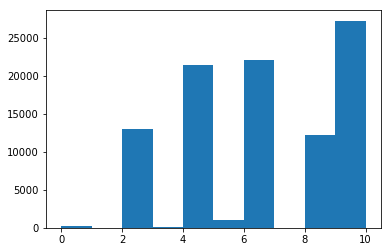

In [54]:
plt.hist(vgr_2016,bins = 10)


(array([  1.53000000e+02,   0.00000000e+00,   6.91400000e+03,
          1.40000000e+02,   9.73100000e+03,   6.06000000e+02,
          1.14750000e+04,   5.00000000e+00,   6.10600000e+03,
          1.48750000e+04]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

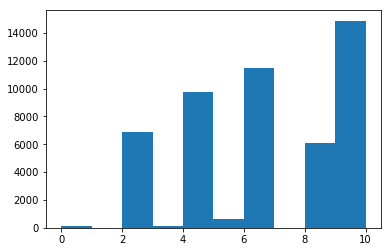

In [55]:
plt.hist(vgr_2017,bins = 10)

In [46]:
viol_present_table[viol_present_table['year']==2014 and viol_present_table['year']=='Cycle Inspection / Initial Inspection']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

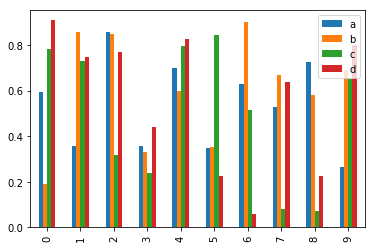

In [57]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar();

In [59]:
df2

,a,b,c,d
0,0.592882,0.191561,0.784422,0.909067
1,0.358346,0.857121,0.730167,0.748896
2,0.858937,0.848456,0.317782,0.769867
3,0.358526,0.329913,0.238232,0.442513
4,0.699418,0.598188,0.795535,0.826526
5,0.347738,0.352036,0.843945,0.224433
6,0.628044,0.901989,0.515090,0.059711
7,0.526920,0.669222,0.081481,0.640575
8,0.725128,0.579744,0.072142,0.226435
9,0.264152,0.691245,0.651727,0.802896


In [2]:
#same_inspection_cycle.to_csv('same_inspection_cycle.csv')
same_inspection_cycle = pd.read_csv('same_inspection_cycle.csv', sep=',',engine='python')
len(same_inspection_cycle)

30138

In [3]:
same_inspection_cycle.head()

,Unnamed: 0,Unnamed: 0.1,CAMIS,date_x,BORO_x,year,02_x,03_x,04_x,05_x,...,05_y,06_y,07_y,08_y,09_y,10_y,22_y,date_init,date_reins,Difference
0,1,3,30112340,2016-10-03,BROOKLYN,2016,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-10-03,2016-10-27,24 days 00:00:00.000000000
1,2,4,30191841,2015-08-31,MANHATTAN,2015,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2015-08-31,2015-09-21,21 days 00:00:00.000000000
2,3,5,40356151,2014-04-11,QUEENS,2014,1.0,0.0,2.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2014-04-11,2014-05-02,21 days 00:00:00.000000000
3,5,8,40356151,2014-10-03,QUEENS,2014,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2014-10-03,2014-11-15,43 days 00:00:00.000000000
4,6,9,40356151,2015-04-24,QUEENS,2015,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015-04-24,2015-05-29,35 days 00:00:00.000000000


For each year, how each many violations are reported for each violation group?
What violations are enclosed in each violation group? 

In [7]:
same_inspection_cycle.groupby('year').sum() 
#[same_inspection_cycle['year']==2014]

,Unnamed: 0,Unnamed: 0.1,CAMIS,02_x,03_x,04_x,05_x,06_x,07_x,08_x,...,02_y,03_y,04_y,05_y,06_y,07_y,08_y,09_y,10_y,22_y
year,,,,,,,,,,,,,,,,,,,,,
2014,143211613,204965079,342200325963,5612.0,78.0,8673.0,430.0,5802.0,8.0,4374.0,...,3161.0,33.0,4998.0,143.0,3515.0,2.0,2755.0,487.0,5515.0,2.0
2015,218848963,312872720,461521748014,6909.0,84.0,10785.0,589.0,7533.0,5.0,5371.0,...,3808.0,35.0,5915.0,158.0,5420.0,1.0,3303.0,660.0,7478.0,46.0
2016,190541431,271782581,357904957341,5083.0,77.0,8124.0,475.0,6145.0,2.0,4311.0,...,2708.0,26.0,4803.0,135.0,4612.0,2.0,2784.0,568.0,5371.0,29.0
2017,85590694,121841252,151392973417,2061.0,43.0,3229.0,224.0,2659.0,0.0,1887.0,...,1172.0,23.0,1581.0,77.0,1901.0,1.0,1040.0,247.0,2416.0,16.0
